In [59]:
import pandas as pd
import numpy as np

# 시각화 라이브러리
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [60]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 보이스피싱 데이터 가져오기

In [2]:
file_path = './data/'

In [3]:
df_vp = pd.read_csv(f'{file_path}voice_phising.csv')

In [4]:
df_vp.head()

,접수부서,접수완료일시,경찰청구분,사건상태,사건종류,신고자 성별,발생지점,발생지 위도,발생지 경도,동일사건여부,연도,월,연월,요일,시간대,일자,발생시도,발생시군구
0,충남청,2020-01-02 09:33:49,충남청,종결요청,보이스피싱,불상,충청남도 천안시 서북구 차암동(부성2동) 524,127.104436,36.841583,NaN,2020.0,1.0,2020-01,목,9.0,2020-01-02,충청남도,천안시
1,충남청,2020-01-02 09:42:45,충남청,종결요청,보이스피싱,불상,충청남도 아산시 풍기동(행정:온양6동) 404-33,127.021875,36.771208,NaN,2020.0,1.0,2020-01,목,9.0,2020-01-02,충청남도,아산시
2,충남청,2020-01-02 10:23:29,충남청,종결요청,보이스피싱,불상,충청남도 서산시 대산읍 대산리(행정:대산읍) 688-1,126.426100,36.947617,NaN,2020.0,1.0,2020-01,목,10.0,2020-01-02,충청남도,서산시
3,대전청,2020-01-02 10:46:31,대전청,종결요청,보이스피싱,불상,대전광역시 유성구 대정동(행정:진잠동) 1-4,127.336373,36.317773,NaN,2020.0,1.0,2020-01,목,10.0,2020-01-02,대전광역시,유성구
4,충남청,2020-01-02 11:00:20,충남청,종결요청,보이스피싱,불상,충청남도 논산시 내동(행정:취암동) 1113,127.104068,36.182762,NaN,2020.0,1.0,2020-01,목,11.0,2020-01-02,충청남도,논산시


In [5]:
df_vp_cn = df_vp[df_vp['발생시도'] == '충청남도']
df_vp_dj = df_vp[df_vp['발생시도'] == '대전광역시']
df_vp_sj = df_vp[df_vp['발생시도'] == '세종시']

In [6]:
display(df_vp_cn.head(), df_vp_dj.head(), df_vp_sj.head())

,접수부서,접수완료일시,경찰청구분,사건상태,사건종류,신고자 성별,발생지점,발생지 위도,발생지 경도,동일사건여부,연도,월,연월,요일,시간대,일자,발생시도,발생시군구
0,충남청,2020-01-02 09:33:49,충남청,종결요청,보이스피싱,불상,충청남도 천안시 서북구 차암동(부성2동) 524,127.104436,36.841583,NaN,2020.0,1.0,2020-01,목,9.0,2020-01-02,충청남도,천안시
1,충남청,2020-01-02 09:42:45,충남청,종결요청,보이스피싱,불상,충청남도 아산시 풍기동(행정:온양6동) 404-33,127.021875,36.771208,NaN,2020.0,1.0,2020-01,목,9.0,2020-01-02,충청남도,아산시
2,충남청,2020-01-02 10:23:29,충남청,종결요청,보이스피싱,불상,충청남도 서산시 대산읍 대산리(행정:대산읍) 688-1,126.426100,36.947617,NaN,2020.0,1.0,2020-01,목,10.0,2020-01-02,충청남도,서산시
4,충남청,2020-01-02 11:00:20,충남청,종결요청,보이스피싱,불상,충청남도 논산시 내동(행정:취암동) 1113,127.104068,36.182762,NaN,2020.0,1.0,2020-01,목,11.0,2020-01-02,충청남도,논산시
11,충남청,2020-01-02 14:36:48,충남청,종결요청,보이스피싱,불상,충청남도 천안시 동남구 신부동(행정:신안동) 945-22,127.149614,36.819400,NaN,2020.0,1.0,2020-01,목,14.0,2020-01-02,충청남도,천안시


,접수부서,접수완료일시,경찰청구분,사건상태,사건종류,신고자 성별,발생지점,발생지 위도,발생지 경도,동일사건여부,연도,월,연월,요일,시간대,일자,발생시도,발생시군구
3,대전청,2020-01-02 10:46:31,대전청,종결요청,보이스피싱,불상,대전광역시 유성구 대정동(행정:진잠동) 1-4,127.336373,36.317773,NaN,2020.0,1.0,2020-01,목,10.0,2020-01-02,대전광역시,유성구
5,대전청,2020-01-02 11:46:36,대전청,종결요청,보이스피싱,불상,대전광역시 유성구 봉명동(행정:원신흥동) 1071-1,127.348079,36.346203,NaN,2020.0,1.0,2020-01,목,11.0,2020-01-02,대전광역시,유성구
6,대전청,2020-01-02 12:33:51,대전청,종결요청,보이스피싱,불상,대전광역시 동구 용전동(행정:용전동) 220,127.430177,36.336496,NaN,2020.0,1.0,2020-01,목,12.0,2020-01-02,대전광역시,동구
7,대전청,2020-01-02 13:22:04,대전청,종결요청,보이스피싱,불상,대전광역시 서구 도안동(행정:가수원동) 1564,127.348042,36.310258,NaN,2020.0,1.0,2020-01,목,13.0,2020-01-02,대전광역시,서구
8,충남청,2020-01-02 13:22:04,충남청,종결요청,보이스피싱,불상,대전광역시 서구 도안동(행정:가수원동) 1564,127.348042,36.310258,NaN,2020.0,1.0,2020-01,목,13.0,2020-01-02,대전광역시,서구


,접수부서,접수완료일시,경찰청구분,사건상태,사건종류,신고자 성별,발생지점,발생지 위도,발생지 경도,동일사건여부,연도,월,연월,요일,시간대,일자,발생시도,발생시군구
13,충남청,2020-01-02 15:48:34,충남청,종결요청,보이스피싱,불상,세종특별자치시 세종시 전동면 노장리(행정:전동면) 440-2,127.272998,36.659795,Y,2020.0,1.0,2020-01,목,15.0,2020-01-02,세종시,전동면
14,충남청,2020-01-02 15:51:57,충남청,종결요청,보이스피싱,불상,세종특별자치시 세종시 전동면 노장리(행정:전동면) 440-2,127.272998,36.659795,Y,2020.0,1.0,2020-01,목,15.0,2020-01-02,세종시,전동면
46,충남청,2020-01-03 17:46:52,충남청,종결요청,보이스피싱,불상,세종특별자치시 세종시 조치원읍 죽림리(행정:조치원읍) 396,127.290570,36.590000,NaN,2020.0,1.0,2020-01,금,17.0,2020-01-03,세종시,조치원읍
49,충남청,2020-01-03 19:19:20,충남청,종결요청,보이스피싱,불상,세종특별자치시 세종시 아름동(도담동) 293,127.249799,36.518343,NaN,2020.0,1.0,2020-01,금,19.0,2020-01-03,세종시,아름동(도담동)
69,충남청,2020-01-07 10:19:42,충남청,종결요청,보이스피싱,불상,세종특별자치시 세종시 어진동(행정:도담동) 648,127.267088,36.495453,NaN,2020.0,1.0,2020-01,화,10.0,2020-01-07,세종시,어진동(행정:도담동)


## 충청남도 보이스피싱 전처리

In [7]:
df_vp_cn = df_vp_cn.groupby(['발생시군구', '연도'])[['경찰청구분']].count()
df_vp_cn = df_vp_cn.unstack()
df_vp_cn = df_vp_cn.reset_index()
df_vp_cn = df_vp_cn.iloc[:, :4]

In [8]:
df_vp_cn.columns = ['행정구역', '2020 보이스피싱 신고 건수', '2021 보이스피싱 신고 건수', '2022 보이스피싱 신고 건수']

In [9]:
df_vp_cn

,행정구역,2020 보이스피싱 신고 건수,2021 보이스피싱 신고 건수,2022 보이스피싱 신고 건수
0,계룡시,105.0,228.0,129.0
1,공주시,371.0,468.0,378.0
2,금산군,157.0,226.0,133.0
3,논산시,357.0,518.0,345.0
4,당진시,586.0,931.0,604.0
5,보령시,260.0,386.0,292.0
6,부여군,145.0,203.0,168.0
7,서산시,571.0,874.0,545.0
8,서천군,154.0,224.0,118.0
9,아산시,1063.0,1700.0,912.0


## 대전광역시 보이스피싱 전처리

In [10]:
df_vp_dj = df_vp_dj.groupby(['발생시군구', '연도'])[['경찰청구분']].count()
df_vp_dj = df_vp_dj.unstack()
df_vp_dj = df_vp_dj.reset_index()
df_vp_dj = df_vp_dj.iloc[:, :4]

In [11]:
df_vp_dj.columns = ['행정구역', '2020 보이스피싱 신고 건수', '2021 보이스피싱 신고 건수', '2022 보이스피싱 신고 건수']

In [12]:
df_vp_dj

,행정구역,2020 보이스피싱 신고 건수,2021 보이스피싱 신고 건수,2022 보이스피싱 신고 건수
0,대덕구,374,299,231
1,동구,511,385,286
2,서구,1009,899,526
3,유성구,837,765,440
4,중구,509,415,313


## 세종특별자치시 보이스피싱 전처리

In [13]:
df_vp_sj.loc[df_vp_sj['발생시군구'] != '조치원읍', '발생시군구'] = df_vp_sj.loc[df_vp_sj['발생시군구'] != '조치원읍', '발생시군구'].apply(lambda x : x[:3])

In [14]:
df_vp_sj

,접수부서,접수완료일시,경찰청구분,사건상태,사건종류,신고자 성별,발생지점,발생지 위도,발생지 경도,동일사건여부,연도,월,연월,요일,시간대,일자,발생시도,발생시군구
13,충남청,2020-01-02 15:48:34,충남청,종결요청,보이스피싱,불상,세종특별자치시 세종시 전동면 노장리(행정:전동면) 440-2,127.272998,36.659795,Y,2020.0,1.0,2020-01,목,15.0,2020-01-02,세종시,전동면
14,충남청,2020-01-02 15:51:57,충남청,종결요청,보이스피싱,불상,세종특별자치시 세종시 전동면 노장리(행정:전동면) 440-2,127.272998,36.659795,Y,2020.0,1.0,2020-01,목,15.0,2020-01-02,세종시,전동면
46,충남청,2020-01-03 17:46:52,충남청,종결요청,보이스피싱,불상,세종특별자치시 세종시 조치원읍 죽림리(행정:조치원읍) 396,127.290570,36.590000,NaN,2020.0,1.0,2020-01,금,17.0,2020-01-03,세종시,조치원읍
49,충남청,2020-01-03 19:19:20,충남청,종결요청,보이스피싱,불상,세종특별자치시 세종시 아름동(도담동) 293,127.249799,36.518343,NaN,2020.0,1.0,2020-01,금,19.0,2020-01-03,세종시,아름동
69,충남청,2020-01-07 10:19:42,충남청,종결요청,보이스피싱,불상,세종특별자치시 세종시 어진동(행정:도담동) 648,127.267088,36.495453,NaN,2020.0,1.0,2020-01,화,10.0,2020-01-07,세종시,어진동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35691,충남청,2023-01-13 16:11:45,세종청,종결요청,보이스피싱,여성,세종특별자치시 세종시 대평동 (대평동 ) 704,127.282222,36.471944,NaN,2023.0,1.0,2023-01,금,16.0,2023-01-13,세종시,대평동
35702,충남청,2023-01-15 00:08:12,세종청,종결요청,보이스피싱,불상,세종특별자치시 세종시 조치원읍 남리(행정:조치원읍 ) 456,127.300360,36.594041,NaN,2023.0,1.0,2023-01,일,0.0,2023-01-15,세종시,조치원읍
35706,충남청,2023-01-15 16:29:14,세종청,종결요청,보이스피싱,남성,세종특별자치시 세종시 소담동(한솔동) 333-10,127.296436,36.484548,NaN,2023.0,1.0,2023-01,일,16.0,2023-01-15,세종시,소담동
35732,충남청,2023-01-18 10:51:29,세종청,종결요청,보이스피싱,남성,세종특별자치시 세종시 전동면 청송리(행정:전동면 ) 154-2,127.257393,36.664743,NaN,2023.0,1.0,2023-01,수,10.0,2023-01-18,세종시,전동면


In [15]:
df_vp_sj = df_vp_sj.groupby(['발생시군구', '연도'])[['경찰청구분']].count()
df_vp_sj = df_vp_sj.unstack()
df_vp_sj = df_vp_sj.reset_index()
df_vp_sj = df_vp_sj.iloc[:, :4]

In [16]:
df_vp_sj.columns = ['행정구역', '2020 보이스피싱 신고 건수', '2021 보이스피싱 신고 건수', '2022 보이스피싱 신고 건수']

In [17]:
df_vp_sj = df_vp_sj.dropna()

In [18]:
df_vp_sj

,행정구역,2020 보이스피싱 신고 건수,2021 보이스피싱 신고 건수,2022 보이스피싱 신고 건수
0,가람동,1.0,1.0,1.0
1,고운동,55.0,97.0,63.0
2,금남면,32.0,60.0,45.0
3,나성동,35.0,74.0,61.0
4,다정동,50.0,78.0,53.0
5,대평동,34.0,45.0,29.0
6,도담동,51.0,99.0,57.0
7,반곡동,32.0,38.0,24.0
8,보람동,63.0,87.0,63.0
9,부강면,32.0,36.0,24.0


# 인구수 데이터 가져오기

In [19]:
file_path_population = f'{file_path}20_22_population/'

In [20]:
df_ppl_cn = pd.read_csv(f'{file_path_population}chungnam_population_20_22.csv', encoding='cp949')
df_ppl_dj = pd.read_csv(f'{file_path_population}daejeon_population_20_22.csv', encoding='cp949')
df_ppl_sj = pd.read_csv(f'{file_path_population}sejong_population_20_22.csv', encoding='cp949')

In [21]:
display(df_ppl_cn.head(), df_ppl_dj.head(), df_ppl_sj.head())

,행정구역,2020년_계_총인구수,2020년_계_연령구간인구수,2020년_계_0~9세,2020년_계_10~19세,2020년_계_20~29세,2020년_계_30~39세,2020년_계_40~49세,2020년_계_50~59세,2020년_계_60~69세,...,2022년_계_10~19세,2022년_계_20~29세,2022년_계_30~39세,2022년_계_40~49세,2022년_계_50~59세,2022년_계_60~69세,2022년_계_70~79세,2022년_계_80~89세,2022년_계_90~99세,2022년_계_100세 이상
0,충청남도 (4400000000),"2,121,029","2,121,029","172,628","202,548","243,200","268,598","327,791","340,183","279,372",...,"202,299","231,139","253,435","327,001","341,662","313,734","173,947","109,748","17,137",437
1,충청남도 천안시 (4413000000),"658,808","658,808","62,156","68,397","96,587","105,456","111,902","103,038","63,642",...,"67,931","92,020","99,599","112,393","105,135","74,559","32,135","16,960","2,531",71
2,충청남도 천안시 동남구 (4413100000),"258,009","258,009","20,449","26,228","35,375","33,239","42,852","43,830","31,198",...,"25,619","33,787","31,051","41,617","43,580","35,914","16,455","8,811","1,360",37
3,충청남도 천안시 서북구 (4413300000),"400,799","400,799","41,707","42,169","61,212","72,217","69,050","59,208","32,444",...,"42,312","58,233","68,548","70,776","61,555","38,645","15,680","8,149","1,171",34
4,충청남도 공주시 (4415000000),"104,545","104,545","5,773","8,159","11,276","9,489","13,316","18,445","18,424",...,"7,971","10,887","8,564","12,459","17,344","20,112","11,431","7,681","1,256",34


,행정구역,2020년_계_총인구수,2020년_계_연령구간인구수,2020년_계_0~9세,2020년_계_10~19세,2020년_계_20~29세,2020년_계_30~39세,2020년_계_40~49세,2020년_계_50~59세,2020년_계_60~69세,...,2022년_계_10~19세,2022년_계_20~29세,2022년_계_30~39세,2022년_계_40~49세,2022년_계_50~59세,2022년_계_60~69세,2022년_계_70~79세,2022년_계_80~89세,2022년_계_90~99세,2022년_계_100세 이상
0,대전광역시 (3000000000),"1,463,882","1,463,882","114,529","146,436","212,488","194,088","237,216","241,921","179,153",...,"140,288","203,887","187,991","226,654","239,260","197,255","95,129","46,641","6,553",181
1,대전광역시 동구 (3011000000),"223,021","223,021","15,010","19,901","30,186","25,852","34,080","36,736","32,564",...,"19,142","29,223","24,554","32,541","35,867","34,891","19,438","9,639","1,231",35
2,대전광역시 중구 (3014000000),"235,550","235,550","15,174","21,987","30,940","26,091","36,905","39,694","33,603",...,"20,447","28,914","24,577","34,019","38,243","35,114","20,726","10,590","1,395",43
3,대전광역시 서구 (3017000000),"477,880","477,880","38,092","49,693","74,090","65,899","78,525","77,731","54,755",...,"47,555","70,677","63,906","74,920","76,468","60,510","27,494","12,924","1,868",51
4,대전광역시 유성구 (3020000000),"351,047","351,047","34,946","38,155","52,744","56,069","60,445","54,074","33,611",...,"37,990","52,333","55,219","60,175","55,889","39,097","14,782","7,201","1,232",29


,행정구역,2020년_계_총인구수,2020년_계_연령구간인구수,2020년_계_0~9세,2020년_계_10~19세,2020년_계_20~29세,2020년_계_30~39세,2020년_계_40~49세,2020년_계_50~59세,2020년_계_60~69세,...,2022년_계_10~19세,2022년_계_20~29세,2022년_계_30~39세,2022년_계_40~49세,2022년_계_50~59세,2022년_계_60~69세,2022년_계_70~79세,2022년_계_80~89세,2022년_계_90~99세,2022년_계_100세 이상
0,세종특별자치시 세종특별자치시 (3611000000),"355,831","355,831","47,283","42,677","37,453","61,492","68,831","45,205","30,139",...,"49,002","38,379","61,083","76,504","51,667","35,788","15,705","8,079","1,398",35
1,세종특별자치시 조치원읍(3611025000),"43,100","43,100","3,228","4,179","6,438","5,442","6,892","6,698","5,360",...,"4,152","6,274","5,036","6,590","6,734","5,773","3,130","1,730",249,7
2,세종특별자치시 연기면(3611031000),"2,729","2,729",81,107,376,340,330,542,510,...,87,351,361,317,466,553,251,159,30,2
3,세종특별자치시 연동면(3611032000),"3,160","3,160",91,128,303,280,330,550,683,...,107,243,253,307,459,723,425,305,71,2
4,세종특별자치시 부강면(3611033000),"6,245","6,245",335,378,741,732,830,"1,111","1,046",...,338,644,647,743,988,"1,152",621,432,57,0


## 충청남도 인구수 전처리

In [22]:
df_ppl_cn

,행정구역,2020년_계_총인구수,2020년_계_연령구간인구수,2020년_계_0~9세,2020년_계_10~19세,2020년_계_20~29세,2020년_계_30~39세,2020년_계_40~49세,2020년_계_50~59세,2020년_계_60~69세,...,2022년_계_10~19세,2022년_계_20~29세,2022년_계_30~39세,2022년_계_40~49세,2022년_계_50~59세,2022년_계_60~69세,2022년_계_70~79세,2022년_계_80~89세,2022년_계_90~99세,2022년_계_100세 이상
0,충청남도 (4400000000),"2,121,029","2,121,029","172,628","202,548","243,200","268,598","327,791","340,183","279,372",...,"202,299","231,139","253,435","327,001","341,662","313,734","173,947","109,748","17,137",437
1,충청남도 천안시 (4413000000),"658,808","658,808","62,156","68,397","96,587","105,456","111,902","103,038","63,642",...,"67,931","92,020","99,599","112,393","105,135","74,559","32,135","16,960","2,531",71
2,충청남도 천안시 동남구 (4413100000),"258,009","258,009","20,449","26,228","35,375","33,239","42,852","43,830","31,198",...,"25,619","33,787","31,051","41,617","43,580","35,914","16,455","8,811","1,360",37
3,충청남도 천안시 서북구 (4413300000),"400,799","400,799","41,707","42,169","61,212","72,217","69,050","59,208","32,444",...,"42,312","58,233","68,548","70,776","61,555","38,645","15,680","8,149","1,171",34
4,충청남도 공주시 (4415000000),"104,545","104,545","5,773","8,159","11,276","9,489","13,316","18,445","18,424",...,"7,971","10,887","8,564","12,459","17,344","20,112","11,431","7,681","1,256",34
5,충청남도 보령시 (4418000000),"100,229","100,229","6,137","8,295","9,528","9,461","13,945","17,212","17,087",...,"7,825","8,594","8,436","12,924","16,330","18,463","11,416","6,904","1,048",25
6,충청남도 아산시 (4420000000),"316,129","316,129","32,946","34,460","36,591","48,420","56,301","46,289","31,885",...,"37,298","37,614","48,659","61,134","50,193","37,374","18,915","10,810","1,610",36
7,충청남도 서산시 (4421000000),"175,591","175,591","15,446","17,252","19,277","22,123","27,814","28,370","22,029",...,"17,174","18,283","20,897","27,603","28,960","24,922","14,179","9,045","1,532",45
8,충청남도 논산시 (4423000000),"116,675","116,675","7,232","9,806","11,387","10,764","15,403","19,703","20,007",...,"9,164","10,225","9,854","14,105","18,822","21,494","12,714","8,657","1,405",35
9,충청남도 계룡시 (4425000000),"42,822","42,822","3,863","6,300","4,903","4,611","8,393","6,927","4,499",...,"6,285","4,753","4,868","8,339","7,547","5,304","2,310","1,207",195,6


In [23]:
col = [0]
for n in range(1, 40, 13):
    col.append(n)

row_cn = [1]
for n in range(4, 18):
    row_cn.append(n)

In [24]:
df_ppl_cn = df_ppl_cn.iloc[row_cn, col]
df_ppl_cn['행정구역'] = df_ppl_cn['행정구역'].str.split(' ').str[1]
df_ppl_cn.columns = ['행정구역', '2020 인구수', '2021 인구수', '2022 인구수']

In [25]:
df_ppl_cn

,행정구역,2020 인구수,2021 인구수,2022 인구수
1,천안시,"658,808","658,486","657,559"
4,공주시,"104,545","103,145","102,571"
5,보령시,"100,229","98,408","97,157"
6,아산시,"316,129","324,580","334,539"
7,서산시,"175,591","176,645","176,413"
8,논산시,"116,675","114,483","112,617"
9,계룡시,"42,822","43,331","44,475"
10,당진시,"166,249","167,092","168,253"
11,금산군,"51,413","50,477","50,092"
12,부여군,"65,354","63,774","62,343"


## 대전광역시 인구수 전처리

In [26]:
df_ppl_dj

,행정구역,2020년_계_총인구수,2020년_계_연령구간인구수,2020년_계_0~9세,2020년_계_10~19세,2020년_계_20~29세,2020년_계_30~39세,2020년_계_40~49세,2020년_계_50~59세,2020년_계_60~69세,...,2022년_계_10~19세,2022년_계_20~29세,2022년_계_30~39세,2022년_계_40~49세,2022년_계_50~59세,2022년_계_60~69세,2022년_계_70~79세,2022년_계_80~89세,2022년_계_90~99세,2022년_계_100세 이상
0,대전광역시 (3000000000),"1,463,882","1,463,882","114,529","146,436","212,488","194,088","237,216","241,921","179,153",...,"140,288","203,887","187,991","226,654","239,260","197,255","95,129","46,641","6,553",181
1,대전광역시 동구 (3011000000),"223,021","223,021","15,010","19,901","30,186","25,852","34,080","36,736","32,564",...,"19,142","29,223","24,554","32,541","35,867","34,891","19,438","9,639","1,231",35
2,대전광역시 중구 (3014000000),"235,550","235,550","15,174","21,987","30,940","26,091","36,905","39,694","33,603",...,"20,447","28,914","24,577","34,019","38,243","35,114","20,726","10,590","1,395",43
3,대전광역시 서구 (3017000000),"477,880","477,880","38,092","49,693","74,090","65,899","78,525","77,731","54,755",...,"47,555","70,677","63,906","74,920","76,468","60,510","27,494","12,924","1,868",51
4,대전광역시 유성구 (3020000000),"351,047","351,047","34,946","38,155","52,744","56,069","60,445","54,074","33,611",...,"37,990","52,333","55,219","60,175","55,889","39,097","14,782","7,201","1,232",29
5,대전광역시 대덕구 (3023000000),"176,384","176,384","11,307","16,700","24,528","20,177","27,261","33,686","24,620",...,"15,154","22,740","19,735","24,999","32,793","27,643","12,689","6,287",827,23


In [27]:
row_dj = []
for n in range(1, 6):
    row_dj.append(n)

In [28]:
df_ppl_dj = df_ppl_dj.iloc[row_dj, col]
df_ppl_dj['행정구역'] = df_ppl_dj['행정구역'].str.split(' ').str[1]
df_ppl_dj.columns = ['행정구역', '2020 인구수', '2021 인구수', '2022 인구수']

In [29]:
df_ppl_dj

,행정구역,2020 인구수,2021 인구수,2022 인구수
1,동구,"223,021","222,222","219,751"
2,중구,"235,550","230,341","227,108"
3,서구,"477,880","473,365","470,374"
4,유성구,"351,047","351,277","356,093"
5,대덕구,"176,384","175,046","172,746"


## 세종특별자치시 인구수 전처리

In [30]:
df_ppl_sj

,행정구역,2020년_계_총인구수,2020년_계_연령구간인구수,2020년_계_0~9세,2020년_계_10~19세,2020년_계_20~29세,2020년_계_30~39세,2020년_계_40~49세,2020년_계_50~59세,2020년_계_60~69세,...,2022년_계_10~19세,2022년_계_20~29세,2022년_계_30~39세,2022년_계_40~49세,2022년_계_50~59세,2022년_계_60~69세,2022년_계_70~79세,2022년_계_80~89세,2022년_계_90~99세,2022년_계_100세 이상
0,세종특별자치시 세종특별자치시 (3611000000),"355,831","355,831","47,283","42,677","37,453","61,492","68,831","45,205","30,139",...,"49,002","38,379","61,083","76,504","51,667","35,788","15,705","8,079","1,398",35
1,세종특별자치시 조치원읍(3611025000),"43,100","43,100","3,228","4,179","6,438","5,442","6,892","6,698","5,360",...,"4,152","6,274","5,036","6,590","6,734","5,773","3,130","1,730",249,7
2,세종특별자치시 연기면(3611031000),"2,729","2,729",81,107,376,340,330,542,510,...,87,351,361,317,466,553,251,159,30,2
3,세종특별자치시 연동면(3611032000),"3,160","3,160",91,128,303,280,330,550,683,...,107,243,253,307,459,723,425,305,71,2
4,세종특별자치시 부강면(3611033000),"6,245","6,245",335,378,741,732,830,"1,111","1,046",...,338,644,647,743,988,"1,152",621,432,57,0
5,세종특별자치시 금남면(3611034000),"8,865","8,865",322,405,888,886,"1,022","1,629","1,767",...,362,840,857,"1,003","1,475","1,896","1,104",752,123,2
6,세종특별자치시 장군면(3611035000),"6,703","6,703",213,297,"1,002",852,915,"1,271","1,128",...,303,926,957,903,"1,290","1,232",622,387,59,1
7,세종특별자치시 연서면(3611036000),"7,481","7,481",313,430,881,725,914,"1,269","1,390",...,394,809,697,777,"1,138","1,501",904,635,90,2
8,세종특별자치시 전의면(3611037000),"5,686","5,686",195,394,563,526,696,"1,053","1,002",...,336,521,468,634,970,"1,114",672,523,81,3
9,세종특별자치시 전동면(3611038000),"3,578","3,578",77,122,284,258,351,712,868,...,101,226,217,309,597,873,491,319,66,0


In [31]:
row_sj = []
for n in range(1, 23):
    row_sj.append(n)

In [32]:
df_ppl_sj = df_ppl_sj.iloc[row_sj, col]
df_ppl_sj['행정구역'] = df_ppl_sj['행정구역'].str.split(' ').str[2].str.split('(').str[0]
df_ppl_sj.columns = ['행정구역', '2020 인구수', '2021 인구수', '2022 인구수']
df_ppl_sj = df_ppl_sj.drop(index=[14, 19])

In [33]:
df_ppl_sj

,행정구역,2020 인구수,2021 인구수,2022 인구수
1,조치원읍,"43,100","43,262","42,309"
2,연기면,"2,729","2,812","2,650"
3,연동면,"3,160","3,112","2,966"
4,부강면,"6,245","6,152","5,878"
5,금남면,"8,865","8,975","8,682"
6,장군면,"6,703","6,994","6,890"
7,연서면,"7,481","7,380","7,215"
8,전의면,"5,686","5,523","5,483"
9,전동면,"3,578","3,368","3,270"
10,소정면,"2,442","2,270","2,216"


# 보이스피싱, 인구수 데이터 합치기

## 충청남도 데이터셋

In [35]:
df_cn = pd.merge(df_vp_cn, df_ppl_cn, on='행정구역', how='inner')
df_cn

,행정구역,2020 보이스피싱 신고 건수,2021 보이스피싱 신고 건수,2022 보이스피싱 신고 건수,2020 인구수,2021 인구수,2022 인구수
0,계룡시,105.0,228.0,129.0,"42,822","43,331","44,475"
1,공주시,371.0,468.0,378.0,"104,545","103,145","102,571"
2,금산군,157.0,226.0,133.0,"51,413","50,477","50,092"
3,논산시,357.0,518.0,345.0,"116,675","114,483","112,617"
4,당진시,586.0,931.0,604.0,"166,249","167,092","168,253"
5,보령시,260.0,386.0,292.0,"100,229","98,408","97,157"
6,부여군,145.0,203.0,168.0,"65,354","63,774","62,343"
7,서산시,571.0,874.0,545.0,"175,591","176,645","176,413"
8,서천군,154.0,224.0,118.0,"51,866","50,745","49,964"
9,아산시,1063.0,1700.0,912.0,"316,129","324,580","334,539"


In [36]:
df_cn.to_csv(f'{file_path}충청남도_20_22.csv', index=False)

In [41]:
df_cn = pd.read_csv(f'{file_path}충청남도_20_22.csv')

In [42]:
df_cn

,행정구역,보이스피싱 신고 건수,인구수,연도
0,계룡시,105,"42,822",2020
1,공주시,371,"104,545",2020
2,금산군,157,"51,413",2020
3,논산시,357,"116,675",2020
4,당진시,586,"166,249",2020
5,보령시,260,"100,229",2020
6,부여군,145,"65,354",2020
7,서산시,571,"175,591",2020
8,서천군,154,"51,866",2020
9,아산시,1063,"316,129",2020


## 대전광역시 데이터셋

In [39]:
df_dj = pd.merge(df_vp_dj, df_ppl_dj, on='행정구역', how='inner')
df_dj

,행정구역,2020 보이스피싱 신고 건수,2021 보이스피싱 신고 건수,2022 보이스피싱 신고 건수,2020 인구수,2021 인구수,2022 인구수
0,대덕구,374,299,231,"176,384","175,046","172,746"
1,동구,511,385,286,"223,021","222,222","219,751"
2,서구,1009,899,526,"477,880","473,365","470,374"
3,유성구,837,765,440,"351,047","351,277","356,093"
4,중구,509,415,313,"235,550","230,341","227,108"


In [40]:
df_dj.to_csv(f'{file_path}대전광역시_20_22.csv', index=False)

In [43]:
df_dj = pd.read_csv(f'{file_path}대전광역시_20_22.csv')

In [44]:
df_dj

,행정구역,보이스피싱 신고 건수,인구수,연도
0,대덕구,374,"176,384",2020
1,동구,511,"223,021",2020
2,서구,1009,"477,880",2020
3,유성구,837,"351,047",2020
4,중구,509,"235,550",2020
5,대덕구,299,"175,046",2021
6,동구,385,"222,222",2021
7,서구,899,"473,365",2021
8,유성구,765,"351,277",2021
9,중구,415,"230,341",2021


## 세종특별자치시 데이터셋

In [45]:
df_sj = pd.merge(df_vp_sj, df_ppl_sj, on='행정구역', how='inner')
df_sj

,행정구역,2020 보이스피싱 신고 건수,2021 보이스피싱 신고 건수,2022 보이스피싱 신고 건수,2020 인구수,2021 인구수,2022 인구수
0,고운동,55.0,97.0,63.0,"34,431","34,171","35,108"
1,금남면,32.0,60.0,45.0,"8,865","8,975","8,682"
2,다정동,50.0,78.0,53.0,"27,330","28,358","28,472"
3,대평동,34.0,45.0,29.0,"10,973","11,315","11,252"
4,도담동,51.0,99.0,57.0,"39,495","33,331","35,910"
5,보람동,63.0,87.0,63.0,"19,397","19,022","18,967"
6,부강면,32.0,36.0,24.0,"6,245","6,152","5,878"
7,새롬동,50.0,73.0,42.0,"29,430","38,186","39,704"
8,소담동,38.0,63.0,31.0,"32,423","20,406","21,446"
9,소정면,5.0,14.0,8.0,"2,442","2,270","2,216"


In [46]:
df_sj.to_csv(f'{file_path}세종특별자치시_20_22.csv', index=False)

In [47]:
df_sj = pd.read_csv(f'{file_path}세종특별자치시_20_22.csv')

In [48]:
df_sj

,행정구역,보이스피싱 신고 건수,인구수,연도
0,고운동,55,"34,431",2020
1,금남면,32,"8,865",2020
2,다정동,50,"27,330",2020
3,대평동,34,"10,973",2020
4,도담동,51,"39,495",2020
5,보람동,63,"19,397",2020
6,부강면,32,"6,245",2020
7,새롬동,50,"29,430",2020
8,소담동,38,"32,423",2020
9,소정면,5,"2,442",2020


# 인구수 대비 보이스피싱 비율 구하기

In [49]:
display(df_cn.head(), df_dj.head(), df_sj.head())

,행정구역,보이스피싱 신고 건수,인구수,연도
0,계룡시,105,"42,822",2020
1,공주시,371,"104,545",2020
2,금산군,157,"51,413",2020
3,논산시,357,"116,675",2020
4,당진시,586,"166,249",2020


,행정구역,보이스피싱 신고 건수,인구수,연도
0,대덕구,374,"176,384",2020
1,동구,511,"223,021",2020
2,서구,1009,"477,880",2020
3,유성구,837,"351,047",2020
4,중구,509,"235,550",2020


,행정구역,보이스피싱 신고 건수,인구수,연도
0,고운동,55,"34,431",2020
1,금남면,32,"8,865",2020
2,다정동,50,"27,330",2020
3,대평동,34,"10,973",2020
4,도담동,51,"39,495",2020


In [53]:
df_cn['인구수'] = df_cn['인구수'].str.replace(',', '')
df_dj['인구수'] = df_dj['인구수'].str.replace(',', '')
df_sj['인구수'] = df_sj['인구수'].str.replace(',', '')

In [54]:
df_cn['보이스피싱 신고 비율'] = df_cn['보이스피싱 신고 건수'].astype('int')/df_cn['인구수'].astype('int')*100
df_dj['보이스피싱 신고 비율'] = df_dj['보이스피싱 신고 건수'].astype('int')/df_dj['인구수'].astype('int')*100
df_sj['보이스피싱 신고 비율'] = df_sj['보이스피싱 신고 건수'].astype('int')/df_sj['인구수'].astype('int')*100

In [55]:
display(df_cn.head(), df_dj.head(), df_sj.head())

,행정구역,보이스피싱 신고 건수,인구수,연도,보이스피싱 신고 비율
0,계룡시,105,42822,2020,0.245201
1,공주시,371,104545,2020,0.354871
2,금산군,157,51413,2020,0.305370
3,논산시,357,116675,2020,0.305978
4,당진시,586,166249,2020,0.352483


,행정구역,보이스피싱 신고 건수,인구수,연도,보이스피싱 신고 비율
0,대덕구,374,176384,2020,0.212037
1,동구,511,223021,2020,0.229126
2,서구,1009,477880,2020,0.211141
3,유성구,837,351047,2020,0.238430
4,중구,509,235550,2020,0.216090


,행정구역,보이스피싱 신고 건수,인구수,연도,보이스피싱 신고 비율
0,고운동,55,34431,2020,0.159740
1,금남면,32,8865,2020,0.360970
2,다정동,50,27330,2020,0.182949
3,대평동,34,10973,2020,0.309851
4,도담동,51,39495,2020,0.129130


In [56]:
df_cn = df_cn[['행정구역', '보이스피싱 신고 건수', '인구수', '보이스피싱 신고 비율', '연도']]
df_dj = df_dj[['행정구역', '보이스피싱 신고 건수', '인구수', '보이스피싱 신고 비율', '연도']]
df_sj = df_sj[['행정구역', '보이스피싱 신고 건수', '인구수', '보이스피싱 신고 비율', '연도']]

In [61]:
df_cn['인구수'] = df_cn['인구수'].astype('int')
df_dj['인구수'] = df_dj['인구수'].astype('int')
df_sj['인구수'] = df_sj['인구수'].astype('int')

In [62]:
display(df_cn.head(), df_dj.head(), df_sj.head())

,행정구역,보이스피싱 신고 건수,인구수,보이스피싱 신고 비율,연도
0,계룡시,105,42822,0.245201,2020
1,공주시,371,104545,0.354871,2020
2,금산군,157,51413,0.305370,2020
3,논산시,357,116675,0.305978,2020
4,당진시,586,166249,0.352483,2020


,행정구역,보이스피싱 신고 건수,인구수,보이스피싱 신고 비율,연도
0,대덕구,374,176384,0.212037,2020
1,동구,511,223021,0.229126,2020
2,서구,1009,477880,0.211141,2020
3,유성구,837,351047,0.238430,2020
4,중구,509,235550,0.216090,2020


,행정구역,보이스피싱 신고 건수,인구수,보이스피싱 신고 비율,연도
0,고운동,55,34431,0.159740,2020
1,금남면,32,8865,0.360970,2020
2,다정동,50,27330,0.182949,2020
3,대평동,34,10973,0.309851,2020
4,도담동,51,39495,0.129130,2020


# 지역별 EDA

In [79]:
# 팔레트 색 지정
colors = ['#9AC4DA', '#6B9EC6', '#3A566B']
sns.set_palette(sns.color_palette(colors))

## 충청남도

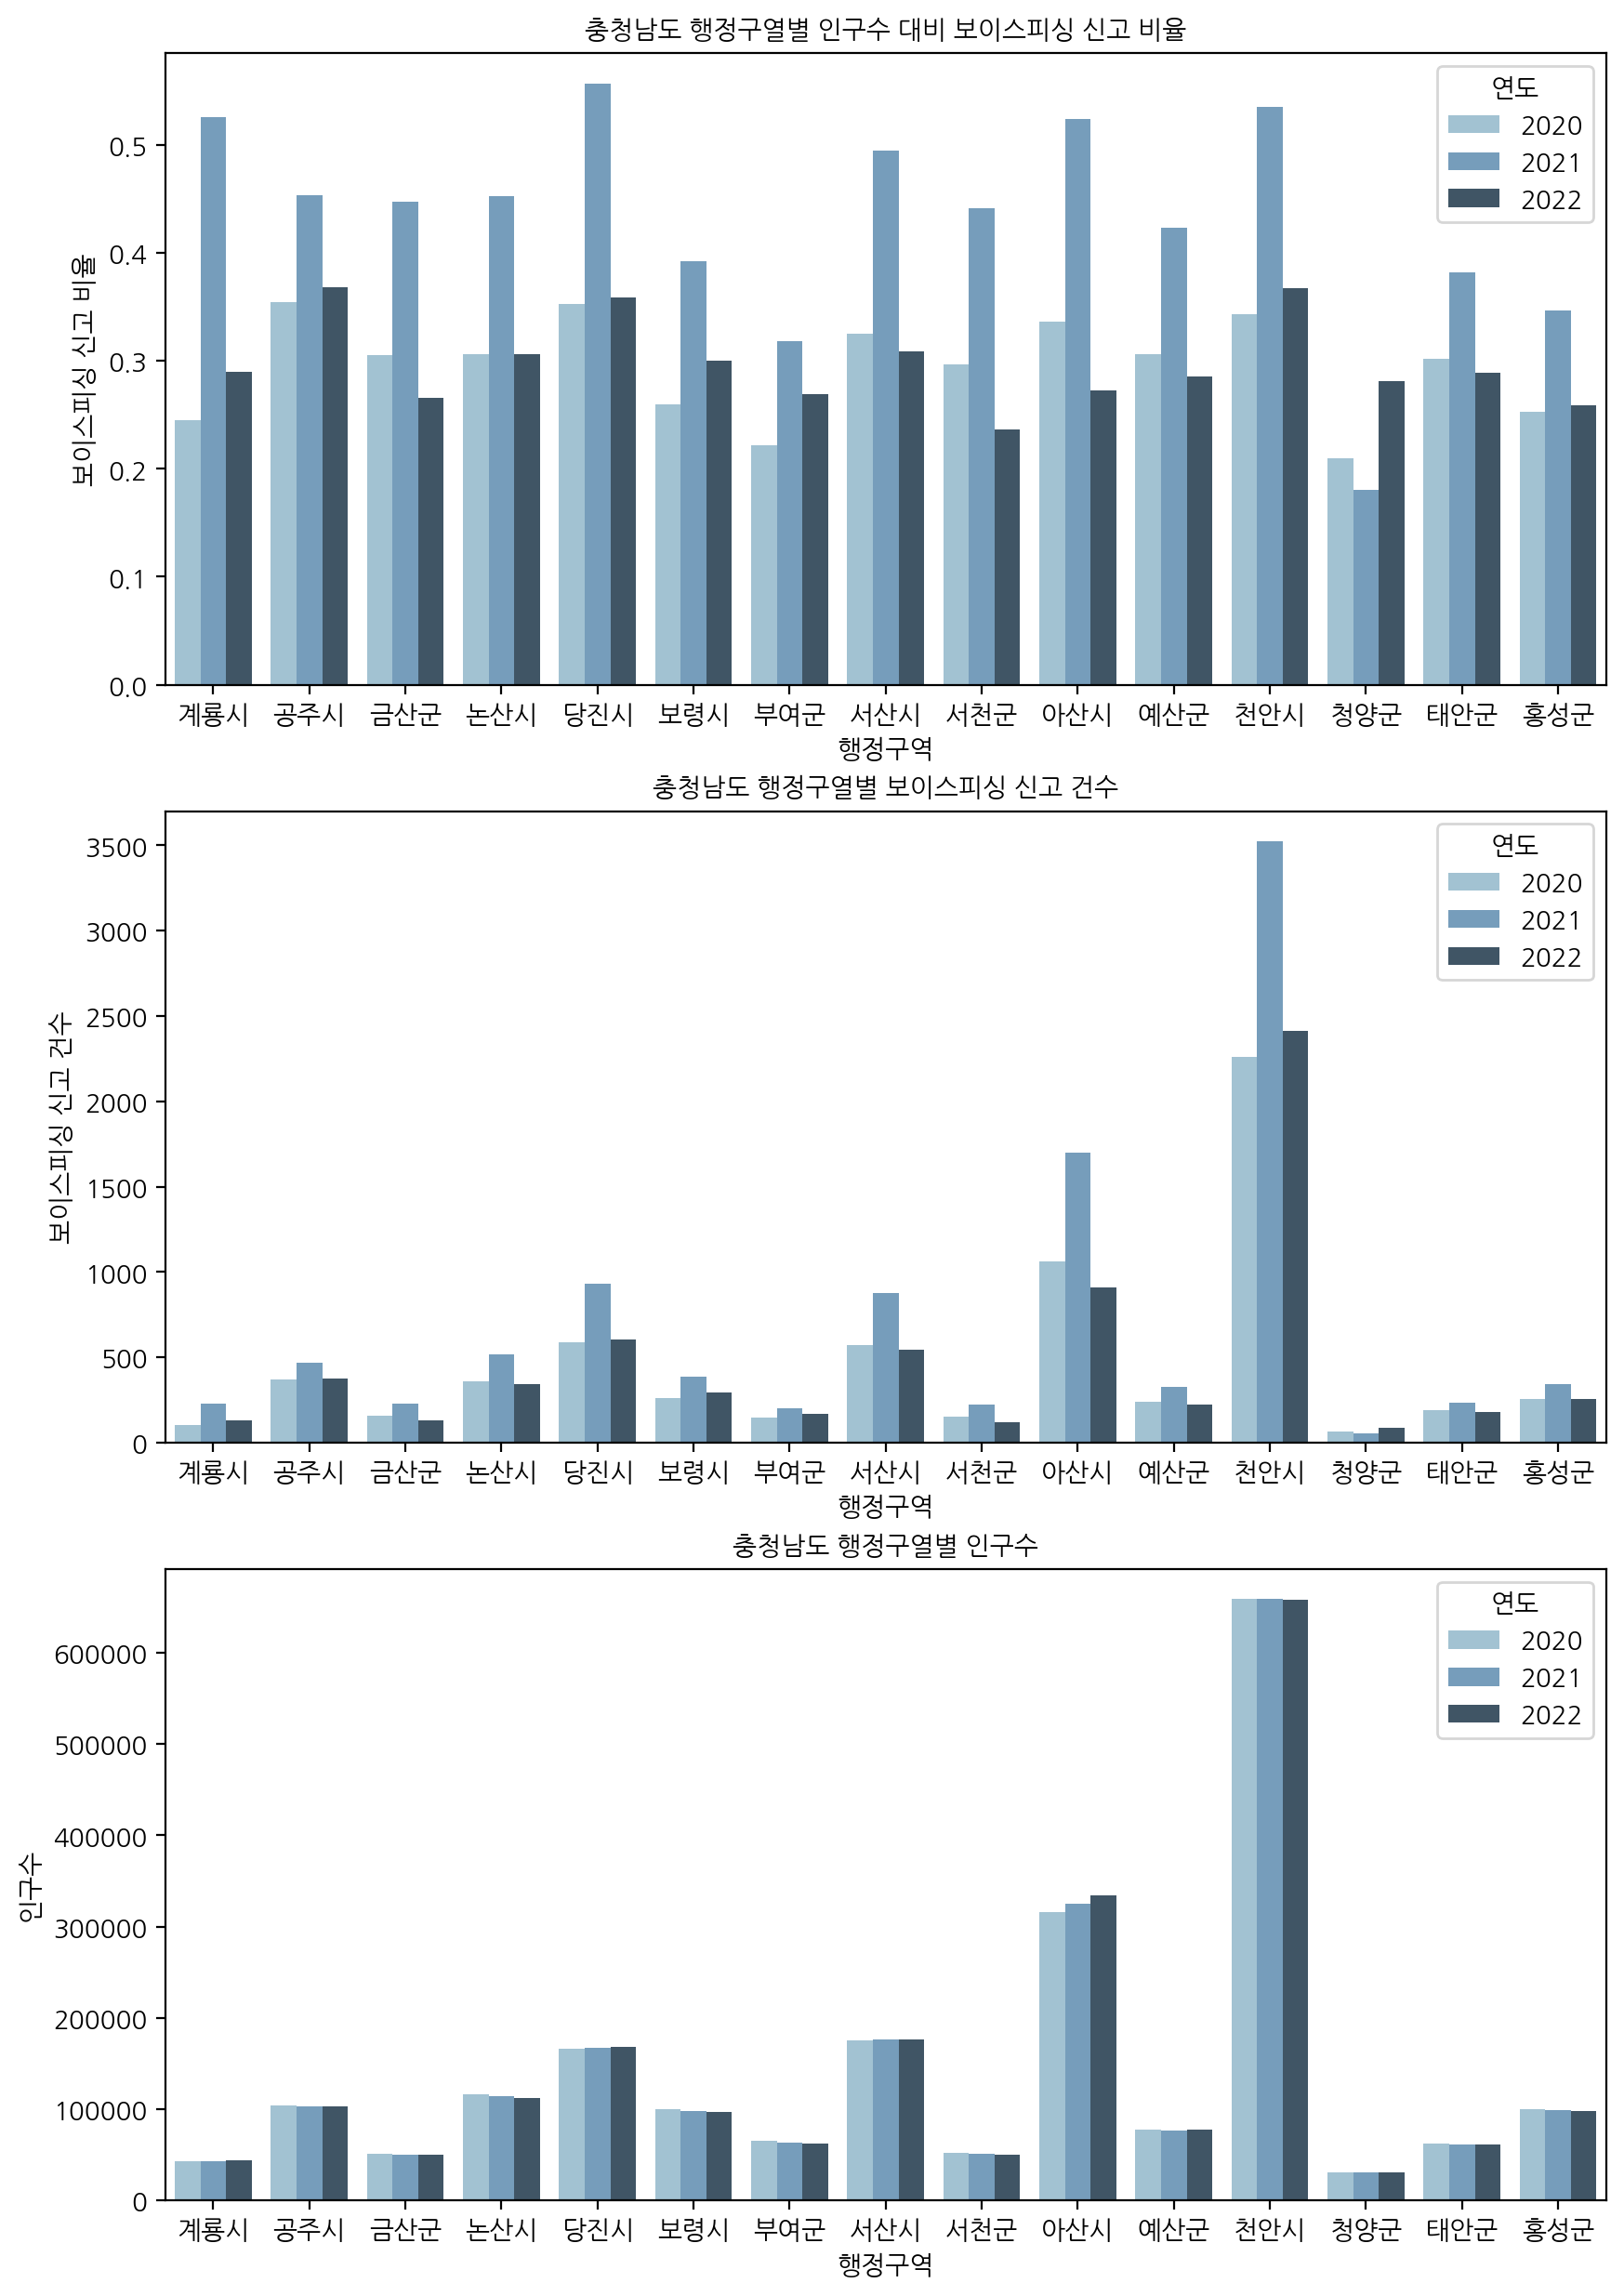

In [80]:
plt.figure(figsize=(10, 15))

plt.subplot(3, 1, 1)
sns.barplot(data=df_cn, x='행정구역', y='보이스피싱 신고 비율', hue='연도')
plt.title('충청남도 행정구열별 인구수 대비 보이스피싱 신고 비율', fontsize = 10)

plt.subplot(3, 1, 2)
sns.barplot(data=df_cn, x='행정구역', y='보이스피싱 신고 건수', hue='연도')
plt.title('충청남도 행정구열별 보이스피싱 신고 건수', fontsize = 10)

plt.subplot(3, 1, 3)
sns.barplot(data=df_cn, x='행정구역', y='인구수', hue='연도')
plt.title('충청남도 행정구열별 인구수', fontsize = 10);

충청남도의 행정구역별 인구수는 아산시를 제외하고는 눈에 띄는 변화가 없는 것으로 나타난다. 보이스피싱 신고 건수는 2020

## 대전광역시

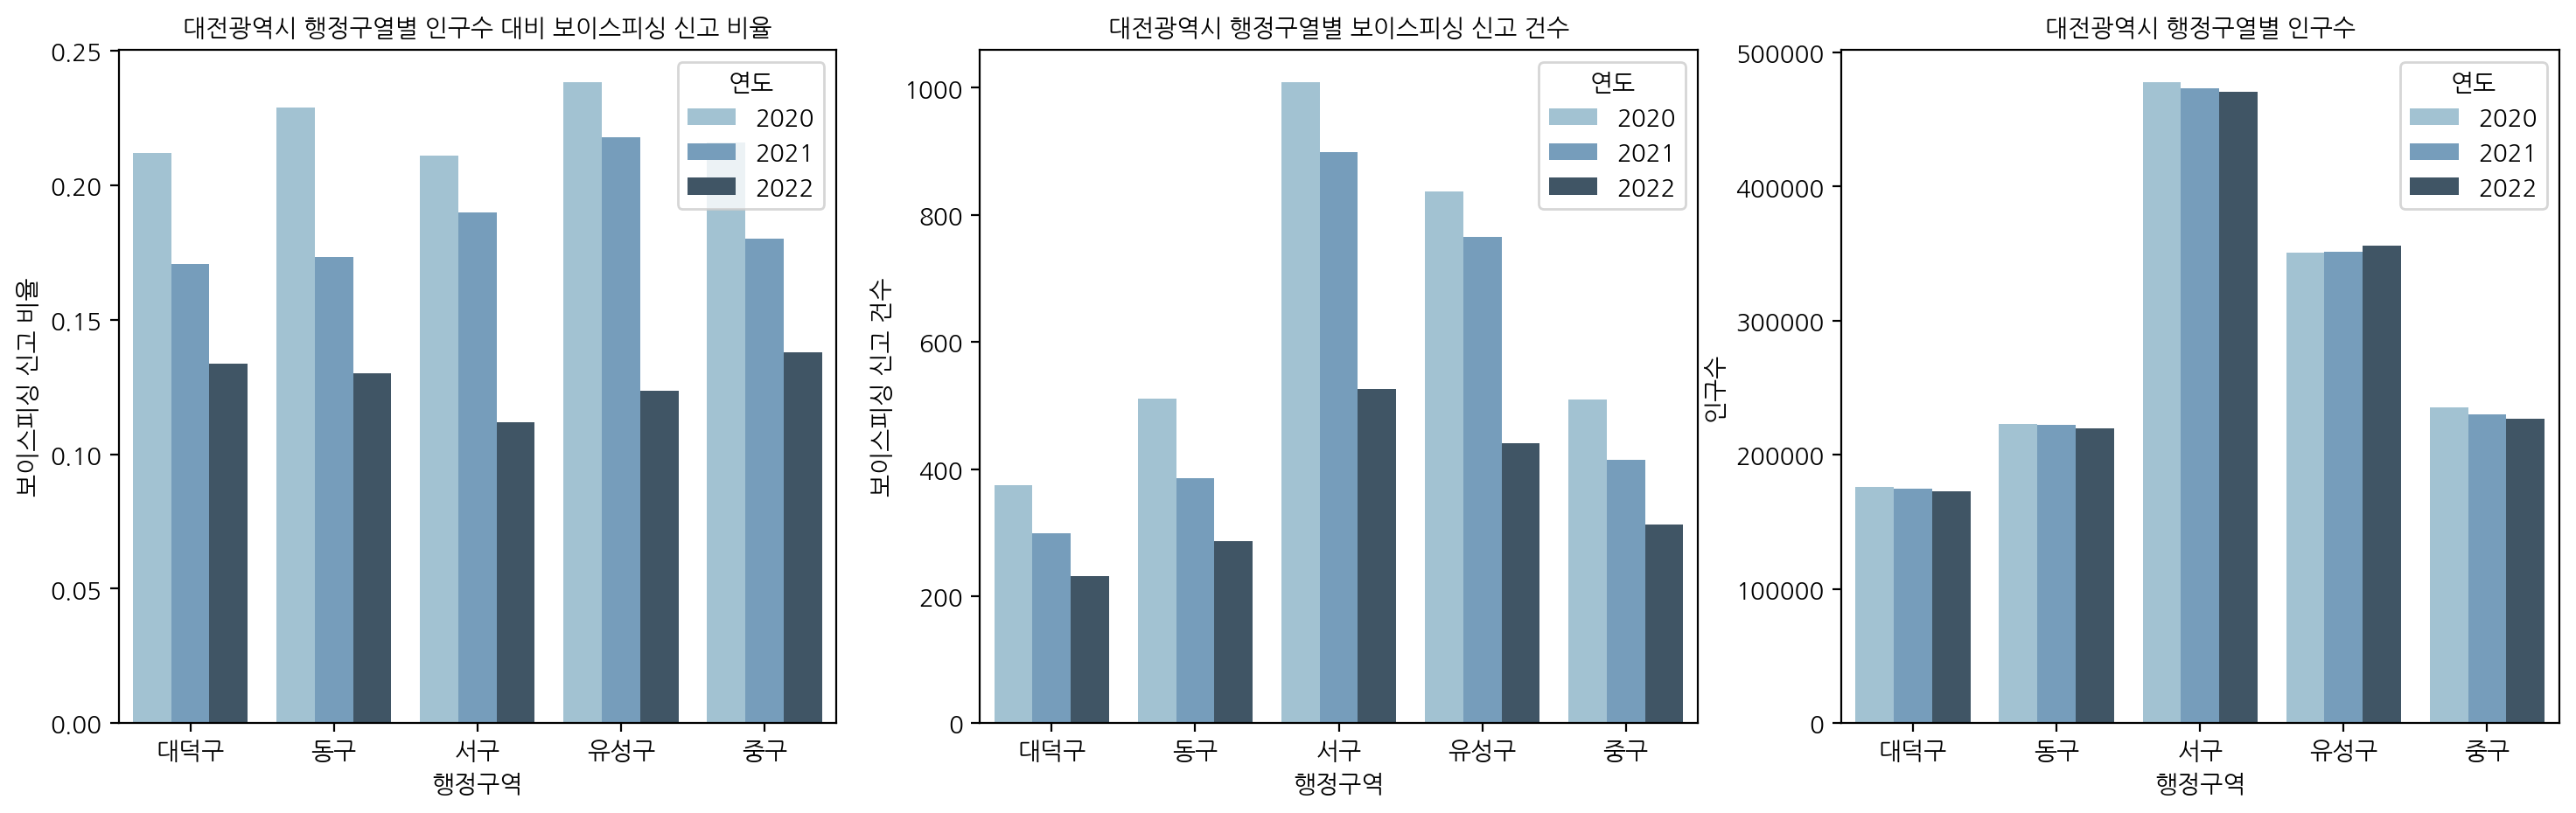

In [81]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.barplot(data=df_dj, x='행정구역', y='보이스피싱 신고 비율', hue='연도')
plt.title('대전광역시 행정구열별 인구수 대비 보이스피싱 신고 비율', fontsize = 10)

plt.subplot(1, 3, 2)
sns.barplot(data=df_dj, x='행정구역', y='보이스피싱 신고 건수', hue='연도')
plt.title('대전광역시 행정구열별 보이스피싱 신고 건수', fontsize = 10)

plt.subplot(1, 3, 3)
sns.barplot(data=df_dj, x='행정구역', y='인구수', hue='연도')
plt.title('대전광역시 행정구열별 인구수', fontsize = 10);

## 세종특별자치시

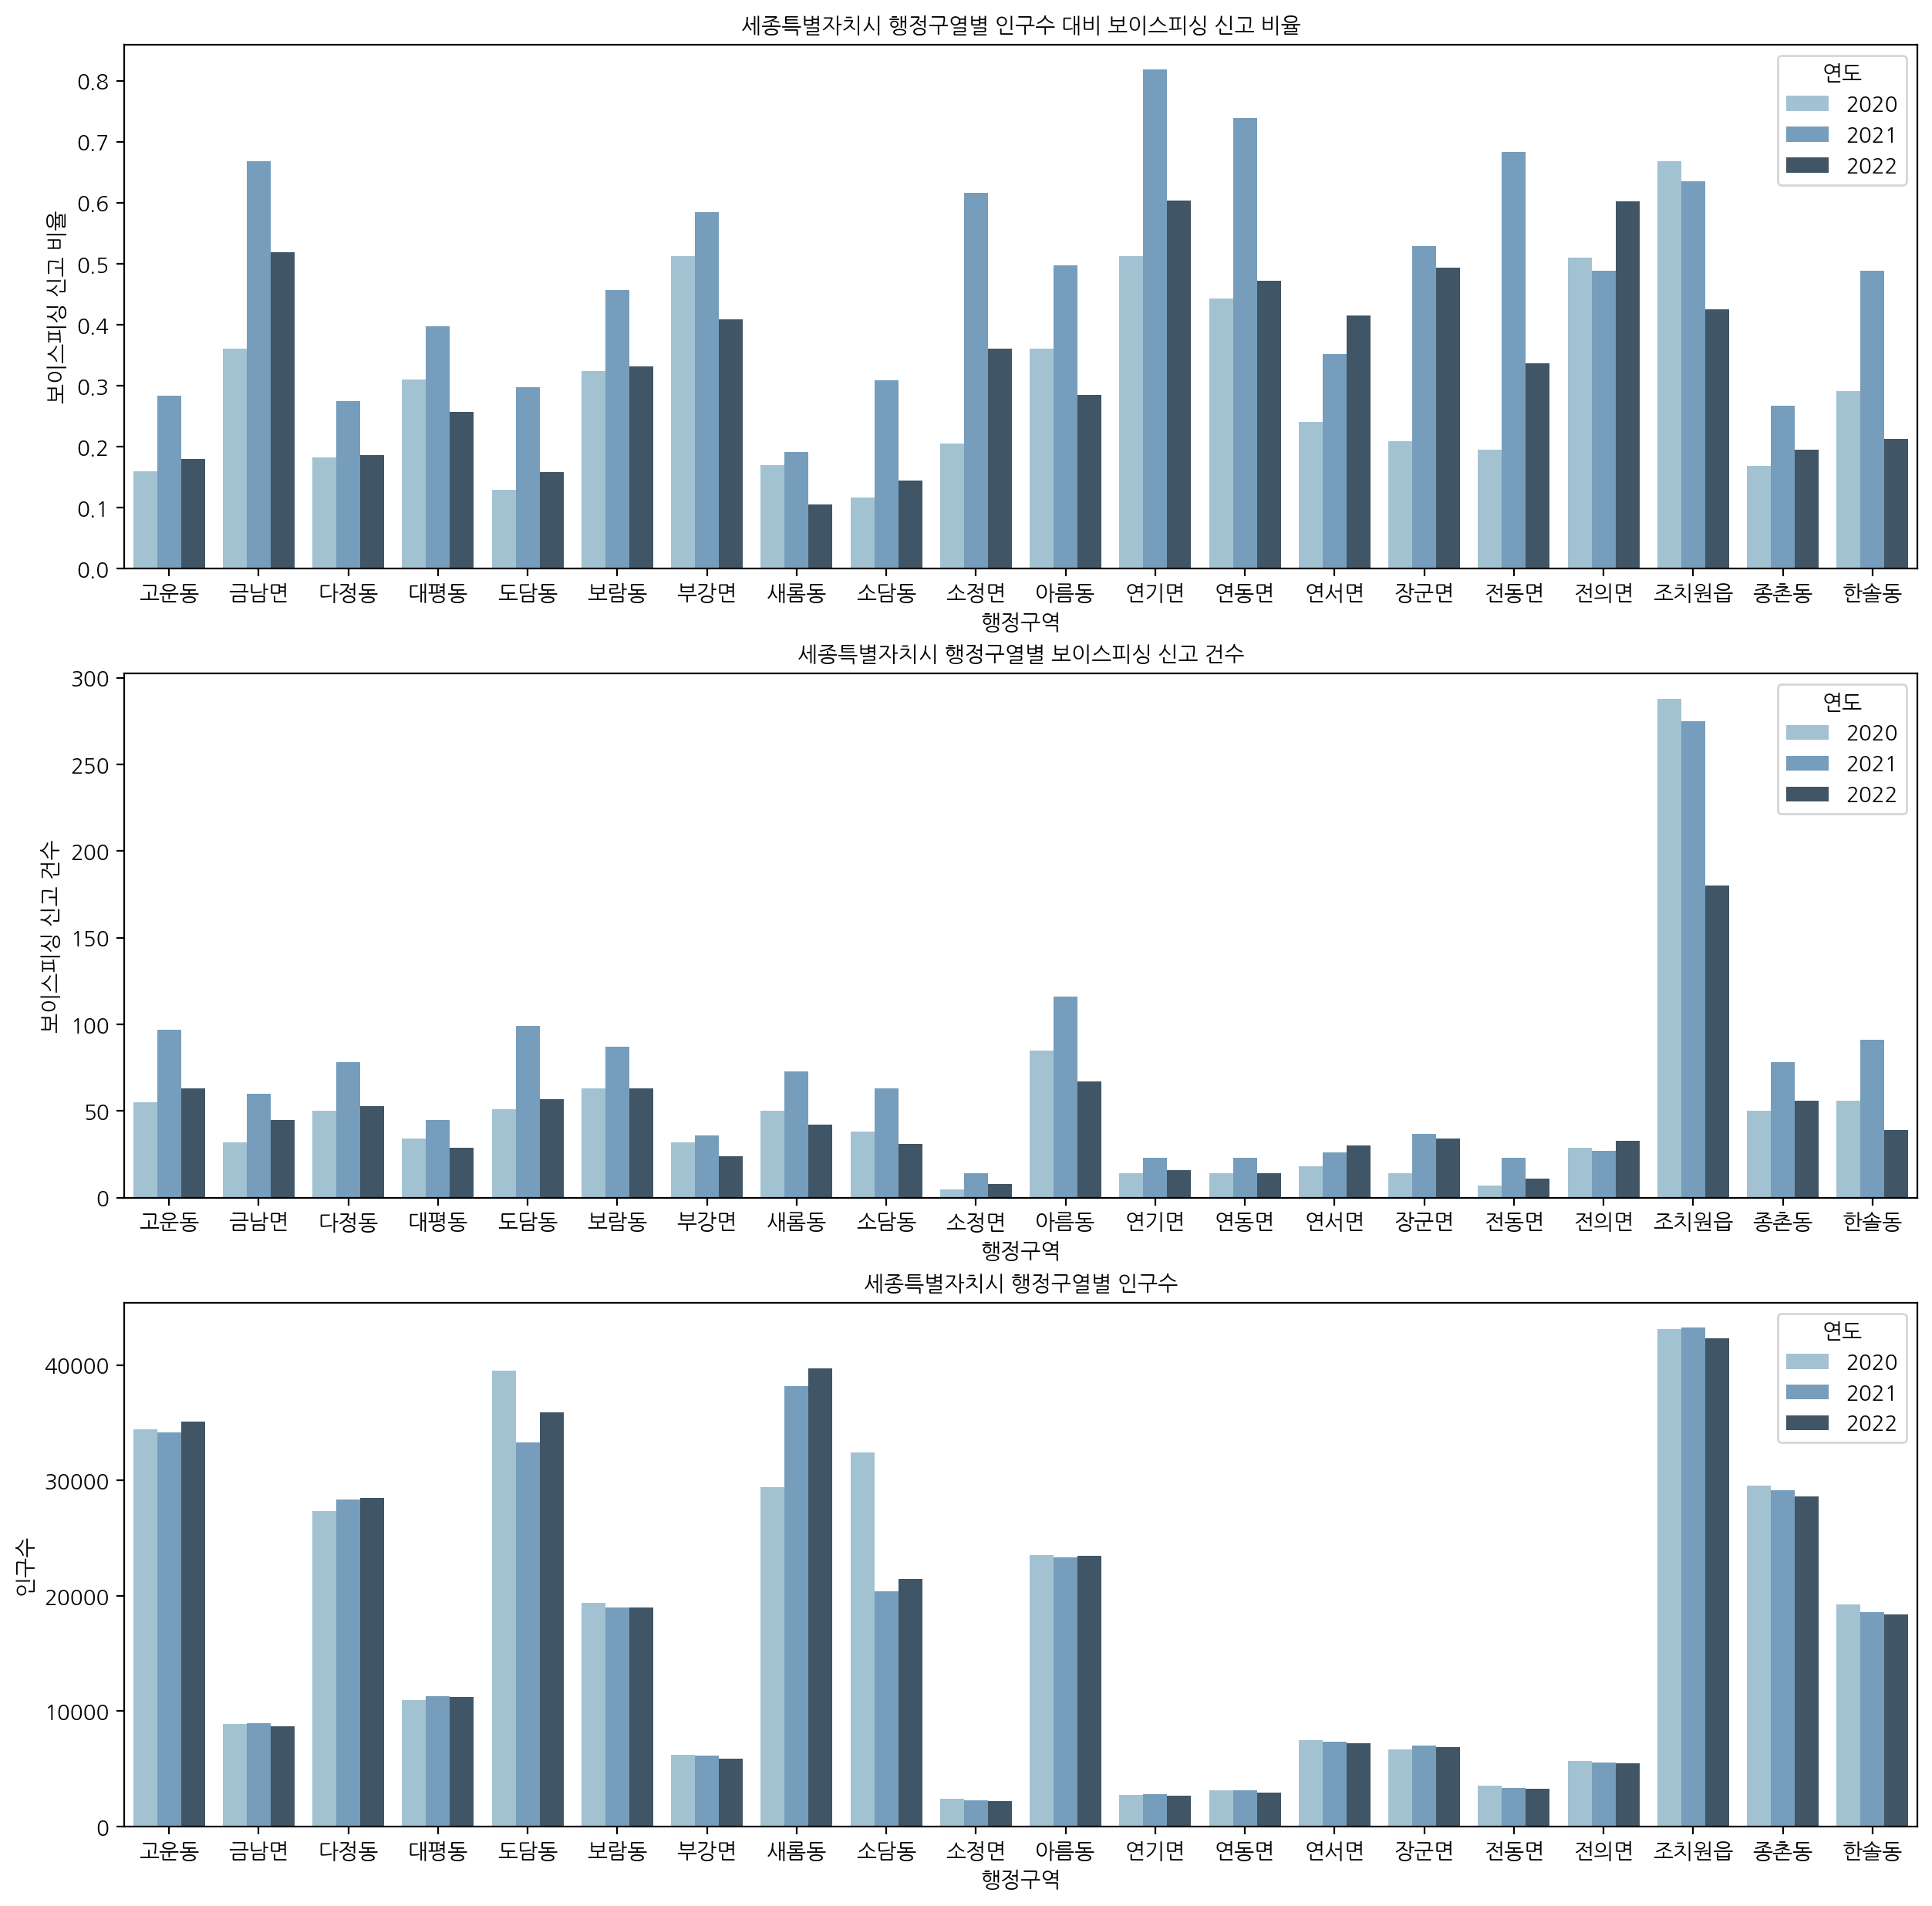

In [82]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 1, 1)
sns.barplot(data=df_sj, x='행정구역', y='보이스피싱 신고 비율', hue='연도')
plt.title('세종특별자치시 행정구열별 인구수 대비 보이스피싱 신고 비율', fontsize = 10)

plt.subplot(3, 1, 2)
sns.barplot(data=df_sj, x='행정구역', y='보이스피싱 신고 건수', hue='연도')
plt.title('세종특별자치시 행정구열별 보이스피싱 신고 건수', fontsize = 10)

plt.subplot(3, 1, 3)
sns.barplot(data=df_sj, x='행정구역', y='인구수', hue='연도')
plt.title('세종특별자치시 행정구열별 인구수', fontsize = 10);